#### Threat analysis possed by top 50 delegates of ENS

**FAQ:** Why only top 50? <br>
<code>#</code>It is not hard-coded. One can provide a list of as many delegates as they want to the script. At the current moment however, top 50 delegates combine to make up just over 68% of the total voting power of ENS DAO. This is sufficient to achieve super-majority. It makes sense to make the cut-off at 50 at the time being.

In [19]:
# Cell 1: environment

import matplotlib.font_manager as fm
import numpy as np
import random as rand
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib.pyplot import gca
import os 
import math as mt
from bs4 import BeautifulSoup
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as ticker
import pandas as pd
import requests
import scipy.fftpack
from pprint import pprint
from operator import itemgetter
%matplotlib inline

cwd = os.getcwd()
pwd = os.path.abspath(os.path.join(cwd, os.pardir))
fontloc = pwd + '/SF-Mono/SFMono-Regular.otf'
font = fm.FontProperties(fname = fontloc,size = 8); prop = font
proplr = fm.FontProperties(fname = fontloc,size = 12)
prop10 = fm.FontProperties(fname = fontloc,size = 10)

fontlocit = pwd + '/SF-Mono/SFMono-RegularItalic.otf'
fontit = fm.FontProperties(fname = fontlocit,size = 8)

#ticks font
def ticks(ax, size):
    font = fm.FontProperties(fname = fontloc,size = size)
    for label in ax.get_xticklabels():
        label.set_fontproperties(font)
    for label in ax.get_yticklabels():
        label.set_fontproperties(font)
        
def ticks3(ax, x, y, z):
    font = fm.FontProperties(fname = fontloc,size = x)
    for label in ax.get_xticklabels():
        label.set_fontproperties(font)
    font = fm.FontProperties(fname = fontloc,size = y)
    for label in ax.get_yticklabels():
        label.set_fontproperties(font)
    font = fm.FontProperties(fname = fontloc,size = z)
    for label in ax.get_zticklabels():
        label.set_fontproperties(font)
        
def xticks(ax, size):
    font = fm.FontProperties(fname = fontloc,size = size)
    for label in ax.get_xticklabels():
        label.set_fontproperties(font)
        
def yticks(ax, size):
    font = fm.FontProperties(fname = fontloc,size = size)
    for label in ax.get_yticklabels():
        label.set_fontproperties(font)

@ticker.FuncFormatter
def major_formatter(x, pos):
    label = str("{0:.1f}".format(x)) if x < 0 else str("{0:.2f}".format(x))
    return label

import matplotlib.colors as colors

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap


In [20]:
# read in data
file_in = cwd + '/ENS.log'
f = open(file_in, 'r')
lines = f.readlines()[1:]
f.close()

rank = []
perc = []
vote = []
name = []

for line in lines:
    if not line.startswith("#"):
        column = line.split()
        rank.append(int(column[0]))
        name.append(str(column[1]))
        perc.append(float(column[2]))
        vote.append(int(column[3]))
            
lines = []
voteCache = vote; percCache = perc

#### Utopia

Consider the hypothetical utopic scenario first. In the trivial utopic scenario where the votes are equally distributed among the delegates following a flat power-spectrum, the analytical estimation of attack surface becomes trivial as well. 

In [21]:
import itertools

totalVotes = int(np.sum(vote)/(np.sum(perc)*0.01))
print('Total Castable Votes: ' + str(totalVotes))
threshold = 1000000
Total = len(rank)

#N-party attack in Utopia
vote = [totalVotes/Total for i in range(Total)]
perc = [100.0/Total for i in range(Total)]
print('Utopia: ' + str(int(totalVotes/Total)) + ' @ ' + str(100.0/Total) + '%')

N = 6; possVec = []
for perps in range(1, Total + 1):
    print('Possible Collusions with ' + str(perps) + ' colluder(s): ' + str(int(np.math.factorial(Total)/(np.math.factorial(Total - perps) * np.math.factorial(perps)))))
    possVec.append(int(np.math.factorial(Total)/(np.math.factorial(Total - perps) * np.math.factorial(perps))))

print('#Discrete Threat Analysis in Utopia')
print('#colluders', '#threats')
for perps in range(3,N + 1):
    perms = list(itertools.combinations(rank,perps))
    threat = []; attackers = []
    for val in perms:
      attack = 0; names = ''; ranks = []
      for i in val:
          attack = attack + vote[int(i - 1)]
          #names = names + name[int(i - 1)] + ';'
          ranks.append(rank[int(i - 1)])
      if attack > threshold:
           #attackers.append(names)
           threat.append(ranks)
      attack = 0
      

    print(perps, len(threat), len(perms))
    
perc = []; vote = []



Total Castable Votes: 6847327
Utopia: 136946 @ 2.0%
Possible Collusions with 1 colluder(s): 50
Possible Collusions with 2 colluder(s): 1225
Possible Collusions with 3 colluder(s): 19600
Possible Collusions with 4 colluder(s): 230300
Possible Collusions with 5 colluder(s): 2118760
Possible Collusions with 6 colluder(s): 15890700
Possible Collusions with 7 colluder(s): 99884400
Possible Collusions with 8 colluder(s): 536878650
Possible Collusions with 9 colluder(s): 2505433700
Possible Collusions with 10 colluder(s): 10272278170
Possible Collusions with 11 colluder(s): 37353738800
Possible Collusions with 12 colluder(s): 121399651100
Possible Collusions with 13 colluder(s): 354860518600
Possible Collusions with 14 colluder(s): 937845656300
Possible Collusions with 15 colluder(s): 2250829575120
Possible Collusions with 16 colluder(s): 4923689695575
Possible Collusions with 17 colluder(s): 9847379391150
Possible Collusions with 18 colluder(s): 18053528883775
Possible Collusions with 19 col

#### Real World

File [ENS.log](https://github.com/inplco/dao-attacks/blob/master/ENS/ENS.log) contains voting data of top 50 ENS delegates scrapped from [Sybil.org](https://sybil.org). The file header contains four columns: <br>
<code>#</code>rank of the delegate, <br>
<code>#</code>name of delegate, <br>
<code>#</code>voting share in percentage of the delegate, and <br>
<code>#</code>number of votes of the delegate.

In [22]:
#N-party attack in reality
print('#Discrete Threat Analysis in Real World')
print('#colluders', '#threats')
perc = percCache; vote = voteCache
delegates = []; hostilities = []
for perps in [4,5,6,47,48,49,50]:
    perms = list(itertools.combinations(rank,perps))
    threats = []; attackers = []; analyses = []
    for val in perms:
      attack = 0; names = []; threat = []
      for i in val:
          attack = attack + vote[int(i - 1)]
          names.append(name[int(i - 1)])
          threat.append(rank[int(i - 1)])
      
      if attack > threshold:
           attackers.append(names)
           threats.append(threat)
      attack = 0
    dangers = [item for sublist in threats for item in sublist]
    for item in rank:
      count = dangers.count(item)
      analyses.append([item, count])
    print(perps, len(threats))
    analysed = sorted(analyses, key=itemgetter(1), reverse=True)
    if len(threats) > 0:
      delegate = range(1, Total + 1)
      hostility = [row[1]/len(threats) for row in analyses]
      delegates.append(delegate)
      hostilities.append(hostility)

#Discrete Threat Analysis in Real World
#colluders #threats
4 302
5 17920
6 478783
47 19600
48 1225
49 50
50 1


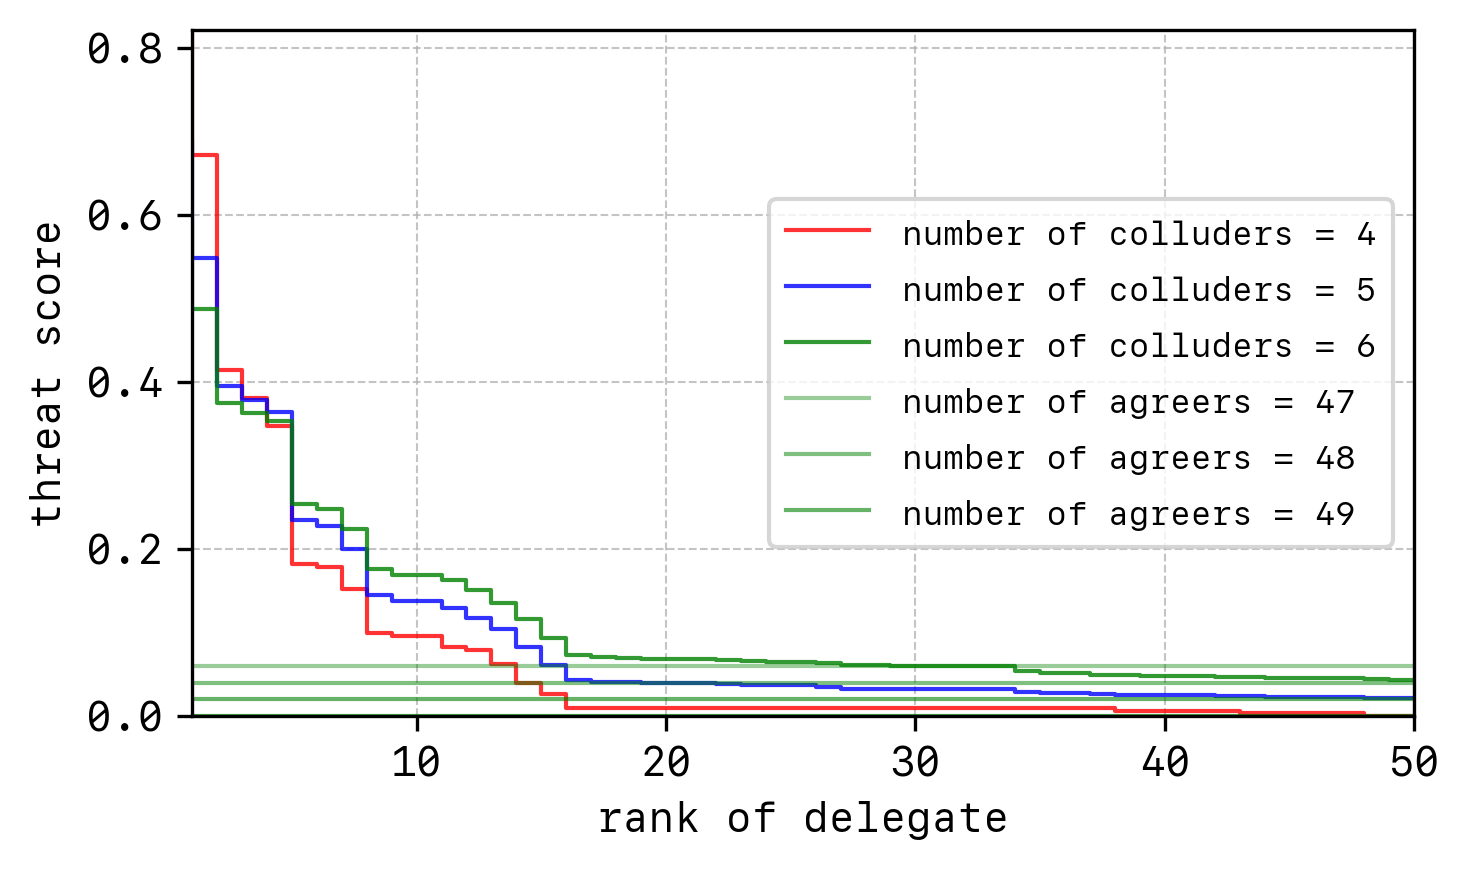

In [25]:
#%config InlineBackend.figure_format = 'svg'
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,3), dpi=300)
plt.subplot(1, 1, 1)  
plt.step(rank, hostilities[0], alpha = 0.8, color='r', linewidth=1.0)
plt.step(rank, hostilities[1], alpha = 0.8, color='b', linewidth=1.0)
plt.step(rank, hostilities[2], alpha = 0.8, color='g', linewidth=1.0)
plt.step(rank, np.subtract(1,hostilities[3]), alpha = 0.4, color='g', linewidth=1.0)
plt.step(rank, np.subtract(1,hostilities[4]), alpha = 0.5, color='g', linewidth=1.0)
plt.step(rank, np.subtract(1,hostilities[5]), alpha = 0.6, color='g', linewidth=1.0)
plt.step(rank, np.subtract(1,hostilities[6]), alpha = 0.7, color='g', linewidth=1.0)
plt.ylabel("threat score",fontproperties=font,fontsize=10)
plt.xlabel("rank of delegate",fontproperties=font,fontsize=10)
ax = gca(); ticks(ax,10); 
plt.grid(alpha=0.75,linestyle='--',linewidth=0.5); ax.autoscale(tight=True)
l1 = ax.legend(['number of colluders = 4', 'number of colluders = 5', 'number of colluders = 6', 'number of agreers = 47', 'number of agreers = 48', 'number of agreers = 49'], loc='center right', ncol=1)
plt.setp(l1.texts, family='SF Mono', fontsize=8)
plt.tight_layout()
plt.savefig(cwd + "/Fig.jpg", dpi=300)
#delegates = []; hostilities = []; threats = []; attackers = []; analyses = []; 

In [24]:
np.sum(voteCache[:27])

3986172